In [19]:
import math
import matplotlib.pyplot as plt

In [20]:
def f(x):
    return 13 * math.sin(x + 13)

In [21]:
def tabulation(a, b, N):
    xl, yl = [], []
    h = (b - a)/N
    x = a
    for i in range(N + 1):
        xl.append(x + i*h)
        yl.append(f(x + i*h))
    return xl, yl

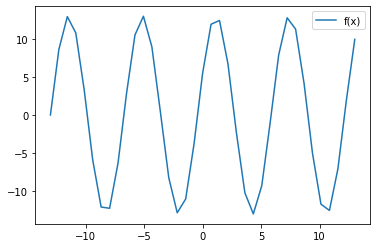

In [22]:
N = 36
k = 13

x, y = tabulation(-k, k, N)
plt.plot(x, y)
plt.legend(['f(x)'])
plt.show()

In [23]:
def bkj(B, X, n, m):
    for k in range(m + 1):
        for j in range(m + 1):
            for i in range(n + 1):
                B[k][j] += pow(X[i], (k + j))

In [24]:
def cj(C, X, Y, n, m):
    for j in range(m + 1):
        for i in range(n):
            C[j] += Y[i]*pow(X[i], j)

In [25]:
def gauss(A, B, X, m):
    for k in range(m):
        p = k
        max = abs(A[k][k])
        
        for i in range(k + 1, m + 1):
            if abs(A[i][k]) > max:
                max = abs(A[i][k])
                p = i
                
        if p != k:
            for j in range(k, m + 1):
                A[k][j], A[p][j] = A[p][j], A[k][j]
            B[k], B[p] = B[p], B[k]
            
        for i in range (k + 1, m + 1):
            t = A[i][k]/A[k][k]
            for j in range(k, m + 1):
                A[i][j] -= t*A[k][j]
            B[i] -= t*B[k]
            
    X[m] = B[m]/A[m][m]
    
    for k in range(m - 1, -1, -1):
        s = 0
        for j in range(k + 1, m + 1):
            s += A[k][j]*X[j]
        X[k] = (1/A[k][k])*(B[k] - s)

In [26]:
def aprox(A, x, m):
    sum = 0
    for i in range(0, m + 1):
        sum += A[i] * pow(x, i)
    return sum

In [27]:
def disp(X, Y, A, n, m):
    D = 0
    sum = 0
    for i in range(0, n + 1):
        sum += pow((Y[i] - aprox(A, X[i], m)), 2)
    D = math.sqrt(sum / (n + 1))
    return D

In [28]:
m = N
n = N
X = x
Y = y

A = [0]*(m + 1)
B = [([0]*(m + 1)) for i in range(m + 1)]
C = [0]*(m + 1)

bkj(B, X, n, m)
cj(C, X, Y, n, m)

gauss(B, C, A, m)

D = disp(X, Y, A, n, m)

In [29]:
xn, yn, eps = [], [], []
DE = 0

for i in range(m + 1):
    xn.append(x[i])
    yn.append(aprox(A, x[i], m))
    eps.append(abs(y[i] - yn[i]))
    DE += pow((y[i] - aprox(A, x[i], m)), 2)
    
DE = math.sqrt(DE / (n + 1))
print(DE)

1.6297316030805684


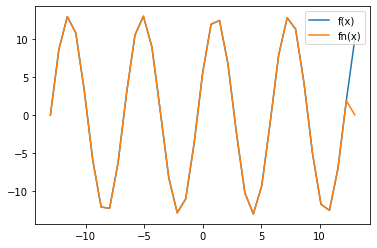

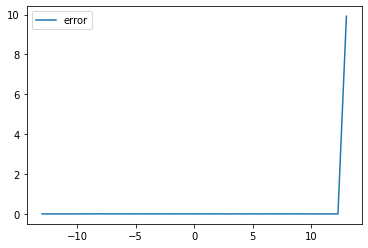

In [30]:
plt.plot(x, y)
plt.plot(xn, yn)
plt.legend(['f(x)', 'fn(x)'])
plt.show()

plt.plot(x, eps)
plt.legend(['error'])
plt.show()

In [31]:
M = [m for m in range(1, N)]
[xt, yt] = tabulation(-k, k, N*20)
DE_ = []
for m in range(1, N):
    n = N*20
    X = xt
    F = yt

    A = [0]*(m + 1)
    B = [([0]*(m + 1)) for i in range(m + 1)]
    C = [0]*(m + 1)

    bkj(B,X,n,m)
    cj(C,X,F,n,m)
    gauss(B,C,A,m)

    D = disp(X,F,A,n,m)
    
    xn, yn, eps = [], [], []
    DE = 0
    for i in range(0, len(xt)):
        xn.append(xt[i])
        yn.append(aprox(A, xt[i], m))
        eps.append(abs(yt[i] - yn[i]))
        DE = DE + pow(yt[i] - aprox(A, xt[i], m), 2)
    DE_.append(math.sqrt(DE/(n + 1)))

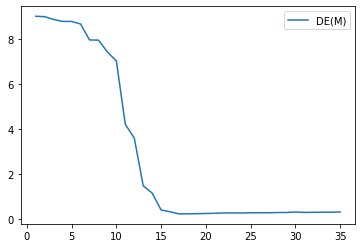

In [32]:
plt.plot(M, DE_)
plt.legend(['DE(M)'])
plt.show()

In [33]:
[xt, yt] = tabulation(-k, k, N*20)
m = 20
n = N*20
X = xt
F = yt

A = [0]*(m + 1)
B = [([0]*(m + 1)) for i in range(m + 1)]
C = [0]*(m + 1)

bkj(B, X, n, m)
cj(C, X, F, n, m)
gauss(B, C, A, m)

D = disp(X, F, A, n, m)

In [34]:
xn, yn, eps = [], [], []
DE = 0
for i in range(0, len(xt)):
    xn.append(xt[i])
    yn.append(aprox(A,xt[i], m))
    eps.append(abs(yt[i] - yn[i]))
    DE = DE + pow(yt[i] - aprox(A, xt[i], m), 2)
DE = math.sqrt(DE/(n + 1))
print(DE)

0.2497716108684565


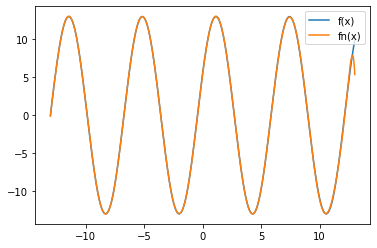

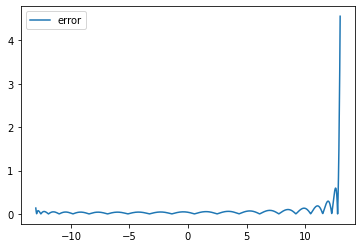

In [35]:
plt.plot(xt, yt)
plt.plot(xn, yn)
plt.legend(['f(x)', 'fn(x)'])
plt.show()

plt.plot(xt, eps)
plt.legend(['error'])
plt.show()